In [6]:
from import_file import *

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs


centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [9]:
X

array([[ 1.29615255, -1.2617488 ],
       [ 0.46502751, -1.26604515],
       [ 0.58399547, -1.08635385],
       ..., 
       [ 1.53383313,  0.96494273],
       [ 0.01570505, -1.68312828],
       [ 0.29911919, -1.09787317]])

In [7]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


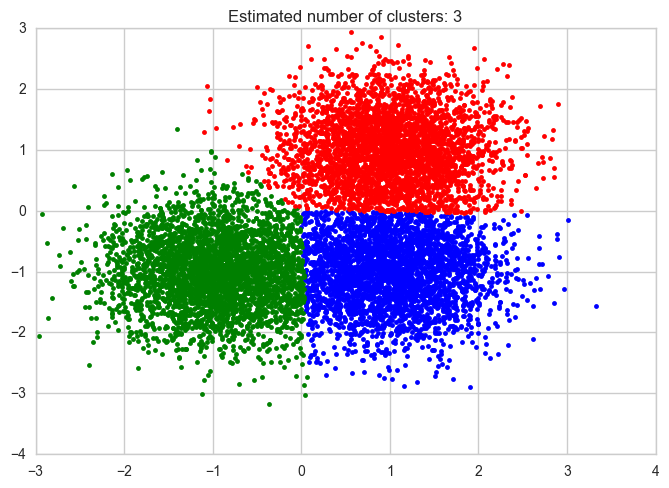

In [8]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
sss

In [1]:
from import_file import *
file_name = '2008_movie.csv'
df = pd.read_csv(file_name, header = 0)
movie_links = df['link'].tolist()

In [2]:
# df

In [3]:
import scrapy
from scrapy.crawler import CrawlerProcess

class MovieSpider(scrapy.Spider):
    name = "movies"
    start_urls = movie_links
#     start_urls = [
#         'https://movie.douban.com/subject/26388624/',
#         'https://movie.douban.com/subject/25934014/',
#         'https://movie.douban.com/subject/25852314/',
#         'https://movie.douban.com/subject/25858763/',
#         'https://movie.douban.com/subject/4811813/'
#     ]

    def parse(self, response):
        title = response.css('div#wrapper div#content h1 span::text').extract_first()
        year = response.css('div#wrapper div#content h1 span.year::text').extract_first().strip('()')
        img_url = response.css('div#mainpic a.nbgnbg img::attr(src)').extract_first()
        
        rating = response.css('div.rating_self.clearfix strong.ll.rating_num::text').extract_first()
        star_distributions = response.css('div.ratings-on-weight div.item span.rating_per::text').extract()
        ratings_num = response.css('div.rating_sum a.rating_people span::text').extract_first()
        
        imdb_id = ''
        for link in response.css('div#info a'):
            if 'imdb' in link.css('::attr(href)').extract_first():
                imdb_id = link.css('::text').extract_first()

        yield {
            'url': response.url,
            'title': title,
            'img_url': img_url,
            'year': year,
            'rating': rating,
            'ratings_num': ratings_num,
            '5_star': star_distributions[0],
            '4_star': star_distributions[1],
            '3_star': star_distributions[2],
            '2_star': star_distributions[3],
            '1_star': star_distributions[4],
            'imdb_id': imdb_id
        }

In [4]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
    'FEED_FORMAT': 'json',
    'FEED_URI': 'movie_2008.json',
    'FEED_EXPORT_ENCODING':'utf-8',
    'COOKIES_ENABLED': False,
    'DOWNLOAD_DELAY': 2,
})

process.crawl(MovieSpider)
process.start() 

2017-02-17 11:52:44 [scrapy.utils.log] INFO: Scrapy 1.3.2 started (bot: scrapybot)
2017-02-17 11:52:44 [scrapy.utils.log] INFO: Overridden settings: {'FEED_EXPORT_ENCODING': 'utf-8', 'COOKIES_ENABLED': False, 'FEED_URI': 'movie_2008.json', 'FEED_FORMAT': 'json', 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)', 'DOWNLOAD_DELAY': 2}
2017-02-17 11:52:44 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.telnet.TelnetConsole']
2017-02-17 11:52:44 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scra

In [5]:
sss

NameError: name 'sss' is not defined

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

import json
from pprint import pprint

In [ ]:
def category_overview(df, category_name, category):   
    sub_df = df[df[category_name].str.contains(category)]
    fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(sub_df)
    slope = fit_fn[1]
    print(category, len(sub_df), fit_fn)
    return len(sub_df), slope

In [ ]:
# Documentary ineffective
categories = ["Romance", "Drama", "Action", 'Sci-Fi', 'Animation', 'Mystery', 'Crime', 'Adventure', 'Comedy']
slopes = []
for category in categories:
    movie_number, slope = category_overview(df, 'genre',category)
    slopes.append(slope)
    plt_configure(title=category + ' (N: '+str(movie_number) +')')
    plt.gcf().set_size_inches(2.5,2.5)
align_figures()

In [ ]:
N = 5
menMeans = (20, 35, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width)
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

In [ ]:
# fig, ax = plt.subplots()
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
fig=plt.gcf()
plt.gca().set_title('测试')

In [ ]:
file_name = 'test.html'
mpld3.save_html(fig, './docs/'+file_name)

In [ ]:
movie_list = [
    {'name': 'Movie 1',
    'genre' :'Action, Fantasy, Horror'},
    {'name': 'Movie 2',
    'genre' :'Action, Comedy, Family'},
    {'name': 'Movie 3',
    'genre' :'Biography, Drama'},
    {'name': 'Movie 4',
    'genre' :'Biography, Drama, Romance'},
    {'name': 'Movie 5',
    'genre' :'Drama'},
    {'name': 'Movie 6',
    'genre' :'Documentary'},
]

In [ ]:
import sass
print sass.compile(string='a { b { color: blue; } }')

In [ ]:
N = 500
x = np.linspace(0, 1, N)
y = np.random.randn(N)
df = pd.DataFrame({'x': x, 'y': y})
df.describe()

In [ ]:
data = df.to_dict(orient='records')

In [ ]:
x, bins,_ = plt.hist(df.x, normed=True)

In [ ]:
print x 
print bins
print np.diff(bins)
np.sum(x * np.diff(bins))

In [ ]:
button = '''<A HREF= "#" onClick="window.open('./test.html', 'Sample');return false">
See the sample</A>.
'''
HTML(button)

In [ ]:
import mpld3
# mpld3.enable_notebook()
from mpld3 import plugins
from jinja2 import Template

In [ ]:
fig, ax = plt.subplots()
x, y = np.random.rand(40), np.random.rand(40)
scatter_plot = ax.scatter(x, y, s=300, alpha=0.3)

labels = ["{0}, {1}".format(round(point[0],2), round(point[1],2)) for point in zip(x, y)]
tooltip = plugins.PointLabelTooltip(scatter_plot, labels)


plugins.connect(fig, tooltip)
mpld3.display(fig)

In [ ]:
from IPython.display import display, HTML, Javascript
from jinja2 import Template
movie_list = [
    {'name': 'Movie 1',
    'image_url' :'https://img1.doubanio.com/view/movie_poster_cover/mpst/public/p2369022569.jpg'},
    {'name': 'Movie 2',
    'image_url' :'https://img1.doubanio.com/view/movie_poster_cover/mpst/public/p2373184418.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
    {'name': 'Movie 3',
    'image_url' :'https://img3.doubanio.com/view/movie_poster_cover/mpst/public/p2372098911.jpg'},
]

In [ ]:
template = Template('''
        <div class='thumbnail'>
            <div class='caption'>
                <h3 class='movie-title'>{{movie['name']}}</h3>
                <img src={{movie['image_url']}}>
                <p><a class='btn btn-primary' >Button</a> <a href='#' class='btn btn-default'>Button</a></p>
            </div>
        </div>
''')

In [ ]:
fig, ax = plt.subplots()
points = ax.plot(range(6), 'o', ms=10) 
labels = [template.render(movie=movie) for movie in movie_list] 

plugins.connect(fig, plugins.PointHTMLTooltip(points[0], labels)) 
mpld3.display(fig)

In [ ]:
load_assets()

In [ ]:
template = Template('''
<div class='row'>
    {% for movie in movies %}
        <div class='col-xs-3'>
            <div class='thumbnail'>
                <div class='caption'>
                    <h3 class='movie-title'>{{movie['name']}}</h3>
                    <img src={{movie['image_url']}}>
                    <p><a class='btn btn-primary' >Button</a> <a href='#' class='btn btn-default'>Button</a></p>
                </div>
            </div>
        </div>
    {% endfor %}
</div>
''')
HTML(template.render(movies=movie_list))